 # *** <font color=#008000>一、資料說明 <font> ***

### <font color=#0000FF>前三筆的資料</font>

In [15]:
import pandas as pd

df=pd.read_csv('train1.csv')#讀檔案
new_df = df.head(3)#取前3筆
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### <font color=#0000FF>資料總比數(乘客數)</font>

In [23]:
len(df)

891

### <font color=#0000FF>資料型態</font>

In [24]:
df.dtypes#資料型態

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

### <font color=#0000FF>空值的欄位筆數</font>

In [25]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

#  ***  <font color=#0000FF>二、單變相數據</font> ***

### <font color=#0000FF>男女統計</font>

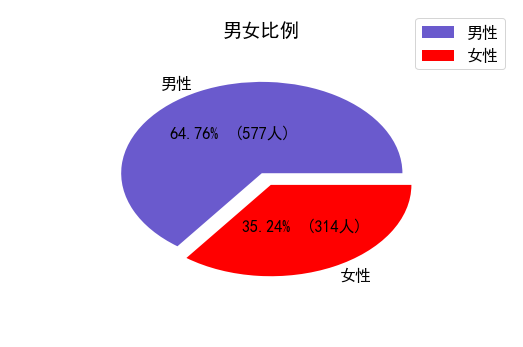

In [183]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties as font
#顯示中文
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font)               # 步?一（?置字体的更多?性）
plt.rc('axes', unicode_minus=False)  # 步?二（解?坐????的???示??）


#男女人數
male= df[df["Sex"] == 'male'].Sex.values.size;
female = df[df["Sex"] == 'female'].Sex.values.size;

# 分類類型
category = ['男性', '女性']
# 每月總花費
expend = [male, female]
# 設定顏色
color = ['#6a5acd', '#ff0000']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)

#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%  ({v:d}人)'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
        explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("男女比例",  x=0.5, y=0.9)

# 畫出圓餅圖
plt.show()

### <font color=#0000FF>歲數統計</font>

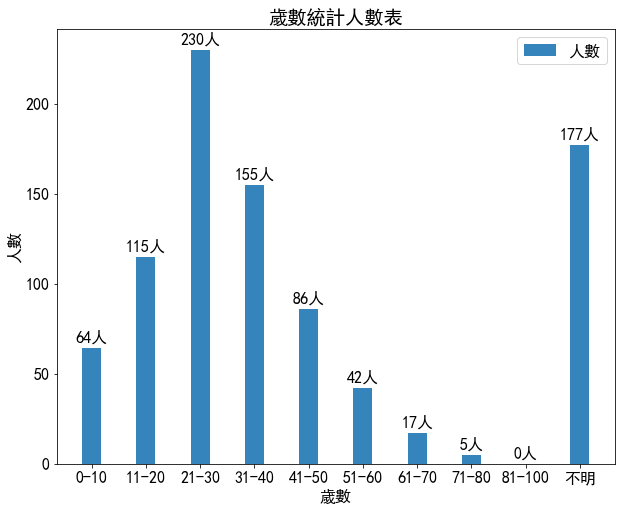

In [182]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font

#顯示中文
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font)               # 步?一（?置字体的更多?性）
plt.rc('axes', unicode_minus=False)  # 步?二（解?坐????的???示??）

df=pd.read_csv('train1.csv')#讀檔案

#依歲數計算人數                                    
b=df[df["Age"].between(0.1,10)].Age.values.size 
c=df[df["Age"].between(10.1,20)].Age.values.size
d=df[df["Age"].between(20.1,30)].Age.values.size
e=df[df["Age"].between(30.1,40)].Age.values.size
f=df[df["Age"].between(40.1,50)].Age.values.size
g=df[df["Age"].between(50.1,60)].Age.values.size
h=df[df["Age"].between(60.1,70)].Age.values.size
i=df[df["Age"].between(70.1,80)].Age.values.size
j=df[df["Age"].between(80.1,100)].Age.values.size
k=df['Age'].isnull().sum()

#生成資訊
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-100','不明']
data1 = [b, c, d, e, f, g, h, i, j, k]
width = 0.7
xpos = np.arange(0,20,2)

#生成柱狀圖
fig, ax = plt.subplots(figsize=(10,8))
bars1 = plt.bar(xpos ,data1, align='center', width=width, alpha=0.9, color='#1f77b4', label = '人數')

#設定每個柱子下面的記號
ax.set_xticks(xpos) #確定每個記號的位置
ax.set_xticklabels(labels)  #確定每個記號的內容

#給每個柱子上面新增標註
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}人'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom'
              )
autolabel(bars1)

#展示結果
plt.legend()
#lable
plt.title("歲數統計人數表") # title
plt.ylabel("人數") # y label
plt.xlabel("歲數") # x label
plt.show()